# Quick Evaluation

In [1]:
import numpy as np 
import pandas as pd 
from pymoo.indicators.hv import HV
import matplotlib.pyplot as plt
from Plugins import evaluation_methods
from Plugins import cd_diagram

In [2]:
#PROBLEMS AND OBJECTIVES
#WFG Problems 
wfg_problems = ['wfg1', 'wfg2', 'wfg3', 'wfg4', 'wfg5', 'wfg6', 'wfg7', 'wfg8', 'wfg9']
#DTLZ Problems 
dtlz_problems = ['dtlz1', 'dtlz2', 'dtlz3', 'dtlz4', 'dtlz5', 'dtlz6', 'dtlz7']
#ZDT Problems 
zdt_problems = ['zdt1', 'zdt2', 'zdt3', 'zdt4', 'zdt6']
#Summary problems 
problems = wfg_problems + dtlz_problems + zdt_problems

In [3]:
operators = ['baseline', 'sam_energy', 'sam_redd','sam_mssd','sam_uniform', 'mut_dirichlet', 
             'mut_lognormal', 'mut_exponential', 'mut_normal']
n = len(operators)

## NSGA-II

In [4]:
DF =evaluation_methods.get_final_reports(['nsgaii'], wfg_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['nsgaii'], dtlz_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['nsgaii'], zdt_problems, 2, operators, 20)

In [6]:
nsgaii_summary = evaluation_methods.merge_dataframes('nsgaii', wfg_problems+dtlz_problems+zdt_problems)
nsgaii_summary.groupby(['Problem', 'Operator']).agg({'HV_gen': ['mean', 'std']}).head(9)

HV_gen          
                             mean       std
Problem Operator                           
dtlz1   baseline         1.228632  0.008552
        mut_dirichlet    1.313474  0.004579
        mut_exponential  1.310479  0.017378
        mut_lognormal    1.229601  0.022830
        mut_normal       1.233024  0.030021
        sam_energy       1.307075  0.007658
        sam_mssd         1.308422  0.009647
        sam_redd         1.303940  0.020232
        sam_uniform      1.299152  0.027684

In [7]:
SS = evaluation_methods.conteo_winners('nsgaii', problems, ['baseline', 'sam_energy', 'sam_uniform','sam_mssd','sam_redd'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,2,1,3,3,12,41
sam_energy,9,6,3,0,3,81
sam_uniform,2,3,4,9,3,55
sam_mssd,6,7,4,2,2,76
sam_redd,2,4,7,7,1,62


In [8]:
SS = evaluation_methods.conteo_winners('nsgaii', problems, ['baseline', 'mut_dirichlet', 'mut_lognormal', 'mut_exponential', 'mut_normal'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,2,4,7,0,8,55
mut_dirichlet,16,1,0,3,1,91
mut_lognormal,0,2,4,9,6,44
mut_exponential,3,10,4,2,2,73
mut_normal,0,4,6,7,4,52


['baseline' 'mut_dirichlet' 'mut_exponential' 'mut_lognormal' 'mut_normal'
 'sam_energy' 'sam_mssd' 'sam_redd' 'sam_uniform']
baseline            1.0
mut_dirichlet      12.0
mut_exponential     3.0
mut_lognormal       0.0
mut_normal          0.0
sam_energy          2.0
sam_mssd            2.0
sam_redd            0.0
sam_uniform         1.0
dtype: float64
mut_lognormal      7.047619
mut_normal         6.666667
baseline           6.428571
sam_uniform        5.380952
sam_redd           4.857143
mut_exponential    4.333333
sam_mssd           4.095238
sam_energy         3.666667
mut_dirichlet      2.523810
dtype: float64
('mut_lognormal', 'sam_energy', 0.00016117095947265625, True)
('mut_normal', 'sam_energy', 0.00024127960205078125, True)
('mut_lognormal', 'sam_mssd', 0.00035381317138671875, True)
('mut_normal', 'sam_mssd', 0.00042629241943359375, True)
('mut_dirichlet', 'mut_lognormal', 0.0008516311645507812, True)
('baseline', 'sam_energy', 0.0010023117065429688, True)
('mut_lognormal', 

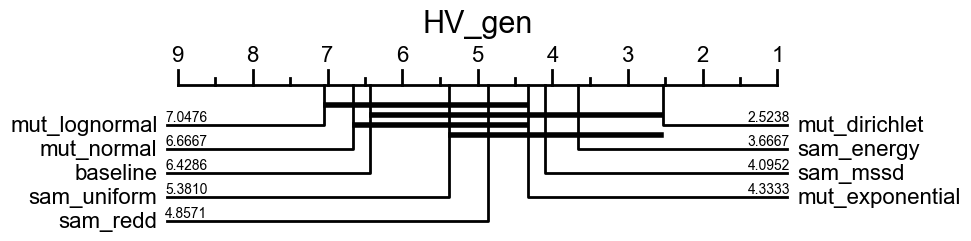

In [9]:
nsgaii_summary = evaluation_methods.merge_dataframes('nsgaii', wfg_problems+dtlz_problems+zdt_problems)
nsgaii_summary = nsgaii_summary.groupby(['Operator', 'Problem'], as_index=False).agg({'HV_gen': 'mean'})
cd_diagram.draw_cd_diagram(df_perf=nsgaii_summary[['Operator', 'Problem', 'HV_gen']], title='HV_gen', labels=True)

## AGE-MOEA

In [10]:
DF =evaluation_methods.get_final_reports(['age_moea'], wfg_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['age_moea'], dtlz_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['age_moea'], zdt_problems, 2, operators, 20)

In [11]:
age_moea_summary = evaluation_methods.merge_dataframes('age_moea', wfg_problems+dtlz_problems+zdt_problems)
age_moea_summary.groupby(['Problem', 'Operator']).agg({'HV_gen': ['mean', 'std']}).head(9)

HV_gen          
                             mean       std
Problem Operator                           
dtlz1   baseline         1.231862  0.004054
        mut_dirichlet    1.314239  0.001629
        mut_exponential  1.248280  0.037105
        mut_lognormal    1.232728  0.014216
        mut_normal       1.232774  0.010901
        sam_energy       1.308451  0.008814
        sam_mssd         1.307522  0.007060
        sam_redd         1.288033  0.032719
        sam_uniform      1.274892  0.037312

In [12]:
SS = evaluation_methods.conteo_winners('age_moea', problems, ['baseline', 'sam_energy', 'sam_uniform', 'sam_energy', 'sam_mssd'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,0,2,8,11,0,54
sam_energy,8,10,2,1,0,88
sam_uniform,3,1,11,6,0,64
sam_mssd,10,8,0,3,0,88


In [13]:
SS = evaluation_methods.conteo_winners('age_moea', problems, ['baseline', 'mut_dirichlet', 'mut_exponential', 'mut_lognormal', 'mut_normal'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,2,5,6,2,6,58
mut_dirichlet,16,4,0,0,1,97
mut_exponential,2,10,5,2,2,71
mut_lognormal,0,1,5,9,6,43
mut_normal,1,1,5,8,6,46


['baseline' 'mut_dirichlet' 'mut_exponential' 'mut_lognormal' 'mut_normal'
 'sam_energy' 'sam_mssd' 'sam_redd' 'sam_uniform']
baseline            0.0
mut_dirichlet      13.0
mut_exponential     1.0
mut_lognormal       0.0
mut_normal          0.0
sam_energy          2.0
sam_mssd            4.0
sam_redd            0.0
sam_uniform         1.0
dtype: float64
mut_lognormal      7.428571
mut_normal         7.380952
baseline           6.523810
mut_exponential    5.238095
sam_uniform        5.238095
sam_redd           4.714286
sam_energy         3.190476
sam_mssd           3.190476
mut_dirichlet      2.095238
dtype: float64
('mut_lognormal', 'sam_energy', 9.5367431640625e-06, True)
('mut_normal', 'sam_energy', 1.33514404296875e-05, True)
('baseline', 'sam_energy', 2.384185791015625e-05, True)
('mut_lognormal', 'sam_mssd', 3.147125244140625e-05, True)
('mut_normal', 'sam_mssd', 3.147125244140625e-05, True)
('baseline', 'sam_mssd', 4.100799560546875e-05, True)
('mut_dirichlet', 'mut_lognormal', 

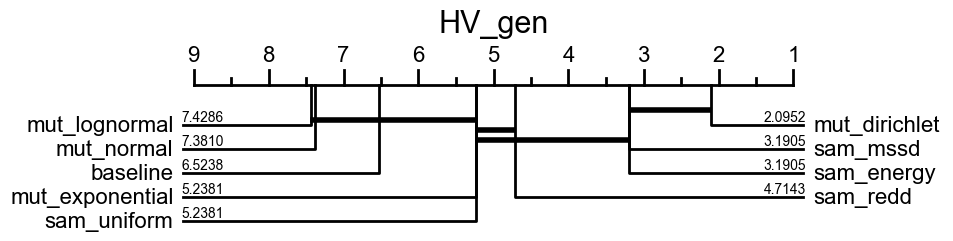

In [14]:
age_moea_summary = evaluation_methods.merge_dataframes('age_moea', wfg_problems+dtlz_problems+zdt_problems)
age_moea_summary = age_moea_summary.groupby(['Operator', 'Problem'], as_index=False).agg({'HV_gen': 'mean'})
cd_diagram.draw_cd_diagram(df_perf=age_moea_summary[['Operator', 'Problem', 'HV_gen']], title='HV_gen', labels=True)

### NSGA-III

In [15]:
DF =evaluation_methods.get_final_reports(['nsgaiii'], wfg_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['nsgaiii'], dtlz_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['nsgaiii'], zdt_problems, 2, operators, 20)

In [16]:
nsgaiii_summary = evaluation_methods.merge_dataframes('nsgaiii', wfg_problems+dtlz_problems+zdt_problems)
nsgaiii_summary.groupby(['Problem', 'Operator']).agg({'HV_gen': ['mean', 'std']}).head(9)

HV_gen          
                             mean       std
Problem Operator                           
dtlz1   baseline         1.219532  0.003912
        mut_dirichlet    1.314172  0.001553
        mut_exponential  1.244452  0.045467
        mut_lognormal    1.223867  0.026713
        mut_normal       1.223483  0.025434
        sam_energy       1.303638  0.014709
        sam_mssd         1.299760  0.016031
        sam_redd         1.284702  0.035963
        sam_uniform      1.285893  0.033746

In [17]:
SS = evaluation_methods.conteo_winners('nsgaiii', problems, ['baseline', 'sam_energy', 'sam_uniform', 'sam_energy', 'sam_mssd'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,2,0,7,12,0,55
sam_energy,10,10,0,1,0,92
sam_uniform,1,1,13,6,0,60
sam_mssd,8,10,1,2,0,87


In [18]:
SS = evaluation_methods.conteo_winners('age_moea', problems, ['baseline', 'mut_dirichlet', 'mut_exponential', 'mut_lognormal', 'mut_normal'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,2,5,6,2,6,58
mut_dirichlet,16,4,0,0,1,97
mut_exponential,2,10,5,2,2,71
mut_lognormal,0,1,5,9,6,43
mut_normal,1,1,5,8,6,46


['baseline' 'mut_dirichlet' 'mut_exponential' 'mut_lognormal' 'mut_normal'
 'sam_energy' 'sam_mssd' 'sam_redd' 'sam_uniform']
baseline            0.0
mut_dirichlet      12.0
mut_exponential     3.0
mut_lognormal       0.0
mut_normal          0.0
sam_energy          3.0
sam_mssd            2.0
sam_redd            0.0
sam_uniform         1.0
dtype: float64
mut_normal         7.952381
mut_lognormal      7.333333
baseline           6.285714
sam_uniform        5.380952
sam_redd           5.095238
mut_exponential    4.714286
sam_mssd           3.142857
sam_energy         3.000000
mut_dirichlet      2.095238
dtype: float64
('mut_dirichlet', 'mut_lognormal', 9.5367431640625e-07, True)
('mut_lognormal', 'sam_mssd', 1.9073486328125e-06, True)
('mut_normal', 'sam_energy', 1.9073486328125e-06, True)
('mut_normal', 'sam_mssd', 1.9073486328125e-06, True)
('mut_dirichlet', 'mut_normal', 2.86102294921875e-06, True)
('mut_lognormal', 'sam_energy', 4.76837158203125e-06, True)
('mut_normal', 'sam_uniform

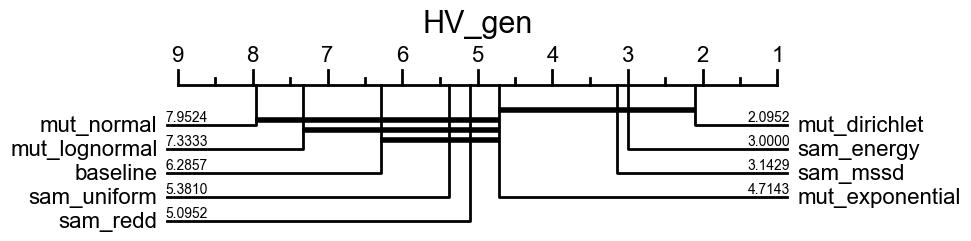

In [19]:
nsgaiii_summary = evaluation_methods.merge_dataframes('nsgaiii', wfg_problems+dtlz_problems+zdt_problems)
nsgaiii_summary = nsgaiii_summary.groupby(['Operator', 'Problem'], as_index=False).agg({'HV_gen': 'mean'})
cd_diagram.draw_cd_diagram(df_perf=nsgaiii_summary[['Operator', 'Problem', 'HV_gen']], title='HV_gen', labels=True)

## MOEAD

In [20]:
DF =evaluation_methods.get_final_reports(['moead'], wfg_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['moead'], dtlz_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['moead'], zdt_problems, 2, operators, 20)

In [21]:
moead_summary = evaluation_methods.merge_dataframes('moead', wfg_problems+dtlz_problems+zdt_problems)
moead_summary.groupby(['Problem', 'Operator']).agg({'HV_gen': ['mean', 'std']}).head(9)

HV_gen          
                             mean       std
Problem Operator                           
dtlz1   baseline         1.096311  0.138717
        mut_dirichlet    0.461827  0.160049
        mut_exponential  0.730706  0.366702
        mut_lognormal    0.971740  0.216373
        mut_normal       0.999129  0.240399
        sam_energy       0.435763  0.214932
        sam_mssd         0.436915  0.101067
        sam_redd         0.987335  0.196809
        sam_uniform      1.038889  0.175743

In [22]:
SS = evaluation_methods.conteo_winners('moead', problems, ['baseline', 'sam_energy', 'sam_uniform', 'sam_energy', 'sam_mssd'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,8,3,8,2,0,80
sam_energy,6,4,6,5,0,74
sam_uniform,6,8,1,6,0,77
sam_mssd,1,6,6,8,0,63


In [23]:
SS = evaluation_methods.conteo_winners('moead', problems, ['baseline', 'mut_dirichlet', 'mut_exponential', 'mut_lognormal', 'mut_normal'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,6,4,5,1,5,68
mut_dirichlet,2,0,5,5,9,44
mut_exponential,8,5,2,2,4,74
mut_lognormal,4,3,7,7,0,67
mut_normal,1,9,2,6,3,62


['baseline' 'mut_dirichlet' 'mut_exponential' 'mut_lognormal' 'mut_normal'
 'sam_energy' 'sam_mssd' 'sam_redd' 'sam_uniform']
the null hypothesis over the entire classifiers cannot be rejected
baseline           5.0
mut_dirichlet      1.0
mut_exponential    6.0
mut_lognormal      3.0
mut_normal         1.0
sam_energy         3.0
sam_mssd           0.0
sam_redd           0.0
sam_uniform        2.0
dtype: float64
sam_mssd           6.238095
mut_dirichlet      6.000000
sam_redd           5.571429
sam_energy         5.333333
mut_normal         4.666667
sam_uniform        4.571429
mut_lognormal      4.476190
baseline           4.285714
mut_exponential    3.857143
dtype: float64
('mut_exponential', 'sam_mssd', 0.0037527084350585938, False)
('mut_dirichlet', 'mut_exponential', 0.008009910583496094, False)
('mut_lognormal', 'sam_mssd', 0.01947307586669922, False)
('mut_normal', 'sam_mssd', 0.02385425567626953, False)
('mut_dirichlet', 'mut_lognormal', 0.02901458740234375, False)
('mut_dirichle

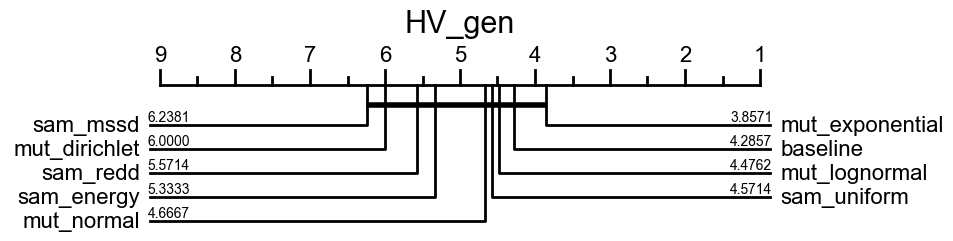

In [24]:
moead_summary = evaluation_methods.merge_dataframes('moead', wfg_problems+dtlz_problems+zdt_problems)
moead_summary = moead_summary.groupby(['Operator', 'Problem'], as_index=False).agg({'HV_gen': 'mean'})
cd_diagram.draw_cd_diagram(df_perf=moead_summary[['Operator', 'Problem', 'HV_gen']], title='HV_gen', labels=True)